# Exploratory Data Analysis - NYC Taxt Trip Duration


Kaggle Competation Link: https://www.kaggle.com/c/nyc-taxi-trip-duration/

## 1. Problem Statement:

In this competition, the challenge is to build a model that predicts the total ride duration of taxi trips in New York City.

## 2. Python Libraries

In [225]:
# #Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels
import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time
import requests
import datetime

import missingno as msno

## 3. Datasets

In [226]:
# #Datasets
!ls input/

sample_submission.csv test.csv              train.csv


In [227]:
# #Train and Test Datasets
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

df_sample_submission = pd.read_csv("input/sample_submission.csv")

### 3.1. Data Dictionary

Dataset: input/train.csv

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

Dataset: input/test.csv

* The train dataset contains 11 columns and the test dataset contains 9 columns. The two additional columns that are present in the train dataset, and not in the test dataset are dropoff_datetime and trip_duration. 

Dataset: input/sample_submission.csv

* id - a unique identifier for each trip
* trip_duration - duration of the trip in seconds

### 3.2. Dataset Overview

#### Training Dataset

In [228]:
print("Total number of samples in train dataset: ", df_train.shape[0])
print("Number of columns in train dataset: ", df_train.shape[1])

('Total number of samples in train dataset: ', 1458644)
('Number of columns in train dataset: ', 11)


In [229]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [230]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [231]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Test Dataset

In [232]:
print("Total number of samples in test dataset: ", df_test.shape[0])
print("Number of columns in test dataset: ", df_test.shape[1])

('Total number of samples in test dataset: ', 625134)
('Number of columns in test dataset: ', 9)


In [233]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


#### Sample Submission Dataset

In [234]:
df_sample_submission.shape

(625134, 2)

In [235]:
df_sample_submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


## 4. Missing Values:

Are there any missing values in the train and test datasets?

In [236]:
df_train.isnull().values.any()

False

In [237]:
df_test.isnull().values.any()

False

_Fortunately, both the train and test datasets are clean & none of the values are missing._

## 5. Open-Questions/Hypothesis:

1. Distances between the Pickup-Dropoff Latitute and Longitude, both individually and spead across the trip_duration.


### 5.1. Difference in the columns between the training and test datasets:
The training dataset contains 11 columns and the test dataset contains 9 columns. The two additional columns that are present in the training dataset, and not in the test dataset are dropoff_datetime and trip_duration. By looking at the sample_submission.csv file, we understand that we need to predict the trip_duration.

### 5.2. Are all the id's in the train and test datasets unique? Is there an overlap, in the observations, between the train and test datasets?

In [238]:
print("Number of ids in the train dataset: ", len(df_train["id"]))
print("Number of unique ids in the train dataset: ", len(pd.unique(df_train["id"])), "\n")

print("Number of ids in the test dataset: ", len(df_test["id"]))
print("Number of unique ids in the test dataset: ", len(pd.unique(df_test["id"])), "\n")

print("Number of common ids(if any) between the train and test datasets: ", \
len(set(df_train["id"].values).intersection(set(df_test["id"].values))))

('Number of ids in the train dataset: ', 1458644)
('Number of unique ids in the train dataset: ', 1458644, '\n')
('Number of ids in the test dataset: ', 625134)
('Number of unique ids in the test dataset: ', 625134, '\n')
('Number of common ids(if any) between the train and test datasets: ', 0)


### 5.3. Are all the vendor_id's in the train and test datasets unique? 

* vendor_id takes on only two values in both the train and test datasets i.e. 1 and 2 (Hypothesis - This could represent data from two different taxi companies)

#### This leads to a set of follow-up questions:

* If the hypothesis is right and the values in the vendor_id column actually represent the data from two different taxi companies; are the number of observations in the dataset from each of the companies comparable or is there any imbalance?(Both in the train and test datasets)

* Among the vendor_id's(1 and 2) - what is the distribution in the number of passengers (passenger_count) across the train and test datasets?

In [239]:
print("Number of vendor_ids in the train dataset: ", len(df_train["vendor_id"]))
print("Number of unique vendor_ids in the train dataset: ", len(pd.unique(df_train["vendor_id"])), "\n")

print("Number of vendor_ids in the test dataset: ", len(df_test["vendor_id"]))
print("Number of unique vendor_ids in the test dataset: ", len(pd.unique(df_test["vendor_id"])), "\n")

('Number of vendor_ids in the train dataset: ', 1458644)
('Number of unique vendor_ids in the train dataset: ', 2, '\n')
('Number of vendor_ids in the test dataset: ', 625134)
('Number of unique vendor_ids in the test dataset: ', 2, '\n')


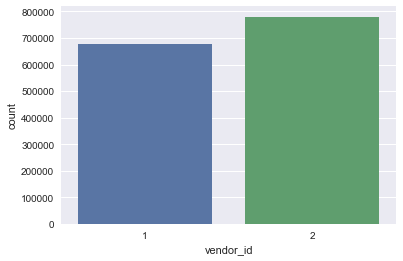

In [240]:
# #The number of observations in the dataset from each of the two companies i.e. 1 and 2, seems to be comparable
# #across the train and test datasets
sns.countplot(x="vendor_id", data=df_train)

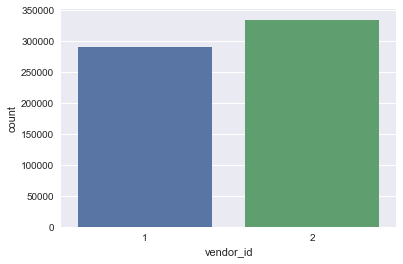

In [241]:
sns.countplot(x="vendor_id", data=df_test)

### 5.4. Distribution of the number of passengers (passenger_count) across the vendor_id variables - 1 and 2, in both the train and test datasets

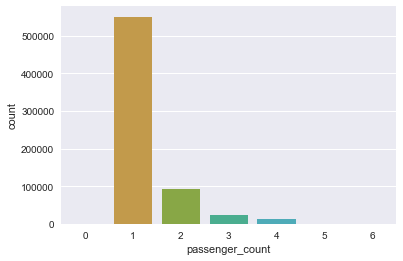

In [242]:
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 1])

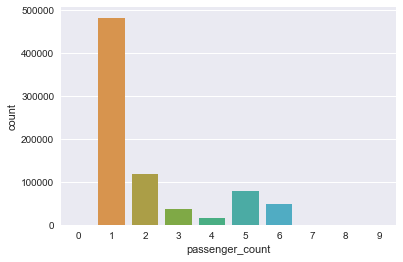

In [243]:
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 2])

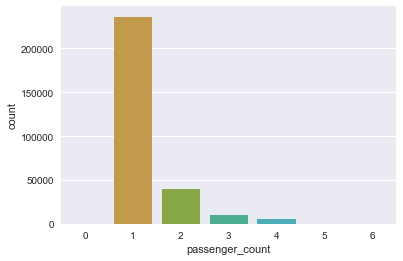

In [244]:
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 1])

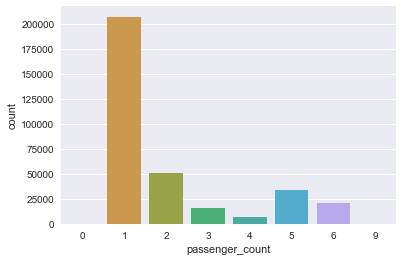

In [245]:
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 2])

### 5.5. Distribution of the trip_duration across the train dataset 

In [246]:
# #String to Datetime conversion
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])

df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])

In [247]:
# #trip_duration represents the difference between the dropoff_datetime and the pickup_datetime in the
# #train dataset
df_train["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [248]:
# #The trip_duration would be a lot more intuitive when the datetime representation is used, 
# #rather than the representation with seconds. 
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
dtype: object

_It is interesting to see that there happens to be a trip that lasted for over 40 days. Let us plot the trip duration in seconds to view any other possbile outliers._

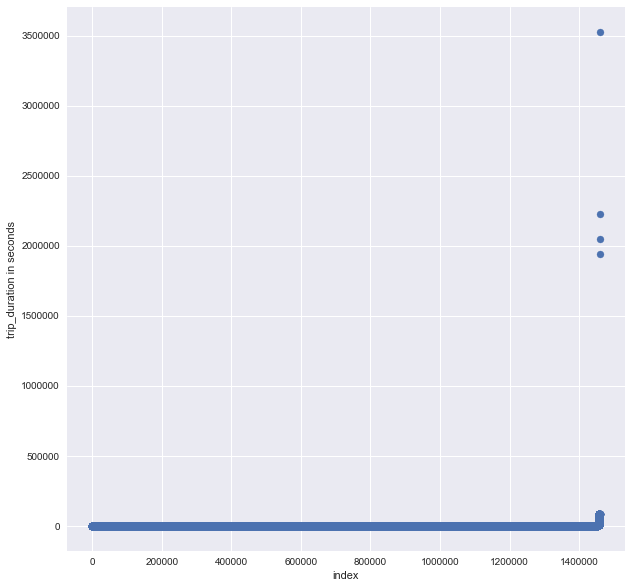

In [249]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

_We see that there are four outliers with trip durations of 20 days or more_

In [250]:
# #Removing the outliers in the dataset
df_train = df_train[df_train["trip_duration"] < 500000]

In [251]:
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

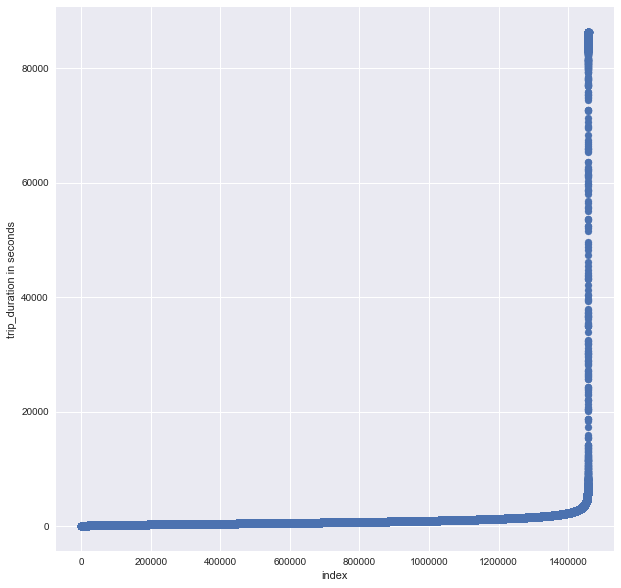

In [252]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

_It is interesting to see that a lot of trips, have a trip duration nearing 23 hours_

### TL;DR - Interesting Observations from the Exploratory Data Analysis

1. vendor_id's takes on only two values in both the train and test datasets i.e. 1 and 2. This could represent data from two different taxi companies

2. There are four outliers in the raw train dataset, with trip durations of 20 days or more. These have been removed during further analysis.

3. It is interesting to see that a lot of trips, have a trip duration nearing 23 hours

** In Progress  **